In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(rc={
    "figure.figsize": (16, 9)
})

In [3]:
df = pd.read_csv("27_10_20_53.csv")

In [4]:
df.head()

,full_name,text_body,author_name,votes,responds_to,parent_submission_name,submission_flair,created_timestamp,parsed_timestamp,controversiality
0,t3_1fo8hat,"Harini Amarasuriya, feminist and outspoken adv...",t2_hwz7hlpj,682,NaN,t3_1fo8hat,Politics,1.727171e+09,1730036388,False
1,t1_loo1nty,I like the fact I am hearing a lot more Dr in ...,t2_7z9p1u76,203,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False
2,t1_loo6dk0,She's an excellent lecturer and very popular w...,t2_88sa0qyh,255,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False
3,t1_loo37mt,From the perspective of a bi-racial child of a...,t2_yhhuya1j4,135,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False
4,t1_loo9jcy,Let's hope we see some change here finally. Pe...,t2_14avw6woy3,35,t3_1fo8hat,t3_1fo8hat,Politics,1.727171e+09,1730036390,False


### Описание столбцов
1. *full_name* - Идентификатор текстовой записи (публикация или комментарий). Тип: строка.
2. *text_body* - Текстовое содержание записи, кодированное в UTF-8. Может содержать несвязный текст или текст на языке, отличном от английского. Может содержать пропуски (автор удалил аккаунт или комментарий). Тип: строка.
3. *author_name* - Идентификатор автора текстовой записи. Может содержать пропуски (автор удалил аккаунт). Тип: строка.
4. *votes* - Рейтинг записи. Тип: число.
5. *responds_to* - Идентификатор записи, на которую отвечает данная. Может содержать пропуски (запись является корневой публикацией). Тип: строка.
6. *parent_submission_name* - Идентификатор публикации, в дереве которой находится данная запись. Может содержать пропуски (запись является корневой публикацией). Тип: строка.
7. *submission_flair* - Категория текстовой записи. Единая для всего дерева публикации. Тип: строка
8. *created_timestamp* - UNIX метка времени создания записи по данным Reddit. Тип: число
9. *parsed_timestamp* - UNIX метка времени сохранения записи парсером. Тип: число
10. *controversiality* - Отметка о спорности публикации по данным Reddit. Тип: булев

In [5]:
print(f"Row count: {df.shape[0]}")

print(f"Unique rows: {df["full_name"].nunique()}")
print(f"Unique authors (including null value): {df["author_name"].nunique()}")
print(f"Unique submissions (not comments): {df["parent_submission_name"].nunique()}")

Row count: 51892
Unique rows: 51892
Unique authors (including null value): 7513
Unique submissions (not comments): 922


In [6]:
df["submission_flair"].value_counts()

submission_flair
Discussion          23021
Politics            13827
News                10747
Rumour               4035
Beaurocracy           105
Rumour Disproven      105
Name: count, dtype: int64

1. 51892 уникальных записей, опубликованных 7512 авторами, среди 922 публикаций
2. Записи распределены по 6 категориям, в порядке убывания: Discussion, Politics, News, Rumour, Beaurocracy, Rumour Disproven
3. Категория Beaurocracy имеет [очень нетипичное написание](https://dictionary.cambridge.org/us/dictionary/english-russian/bureaucracy)


### Признак controversiality 

In [7]:
df["controversiality"].value_counts()

controversiality
False    49056
True      2836
Name: count, dtype: int64

In [8]:
df.groupby(["submission_flair", "controversiality"]).size()

submission_flair  controversiality
Beaurocracy       False                 105
Discussion        False               22228
                  True                  793
News              False               10231
                  True                  516
Politics          False               12391
                  True                 1436
Rumour            False                3944
                  True                   91
Rumour Disproven  False                 105
dtype: int64

In [9]:
def build_replies_up(df: pd.DataFrame, starting_node: pd.DataFrame) -> list[str]:
    out = [starting_node["text_body"]]
    next_parent = starting_node["responds_to"]

    while isinstance(next_parent, str):
        node = df[df["full_name"] == next_parent]
        out.append(node.iloc[0]['text_body'])
        next_parent = node.iloc[0]['responds_to']

    return list(reversed(out))

In [10]:
def print_replies(start_id: int) -> None:
    for i in build_replies_up(df, df.iloc[start_id]):
        print(i)
        print("="*20)

In [11]:
df[(df["controversiality"] == True) & (df["submission_flair"] == "Politics")]["text_body"]

15       Isn’t she very opposed to private universities...
30                                               Dr.Cabral
109      I have bsc in Accounting from japura. You can'...
113      How is it fine? That's like in the US, where t...
141                         Did you even watch the videos?
                               ...                        
13808                                               Sajith
13810      Seeing this post for the nth time in this sub 😭
13811                                                Ranil
13812                                                Anura
13813                                    Karma whore much?
Name: text_body, Length: 1436, dtype: object

In [12]:
print_replies(15)

Harini Amarasuriya, feminist and outspoken advocate for the LGBTQ+ community, is the new prime minister of Sri Lanka.
Isn’t she very opposed to private universities? 🤨

I really want to love her but I remember her being vocally opposed to that on Twitter.

Edit: just to clarify here, I am not stating that she actually is against private universities but that I remember her being involved in some of the discussions related to that area. Someone please correct me if I am wrong.

Edit 2: it seems she supports regulation for private universities: https://x.com/dr_harinia/status/1407610723539247113?s=46


In [13]:
print_replies(113)

Harini Amarasuriya, feminist and outspoken advocate for the LGBTQ+ community, is the new prime minister of Sri Lanka.
She's an excellent lecturer and very popular with Open University students. She was what drew many educated youth who are against the JVP's violent, racist roots to the NPP. She's not against private universities, most students that are not in the Anthare leadership are not against them, but only fear that private unis will give the government an excuse to neglect the already derelict public universities and lower the cache of public education. As always there are legitimate issues behind discontent being hijacked by reactionaries on both sides. 

Dr. Harini's revolutionary idea is that university students are not the enemy of the state. She's a moderate whose goal is regulation of and access to quality higher education. And she does not want the military involved in civil affairs. I really hope that she won't get completely swallowed up by politics and lose sight of he

In [14]:
print_replies(13811)

Who are you guys voting for this time ?
Ranil


In [15]:
print_replies(13850)

Good luck to Dr Harini, our first PM with a Doctorate.
These comments damn. Why's everyone like Harini is going to make gay sex mandatory lol ? You are not required to participate unless you want.
What else do you think a gender studies expert will do. I mean, you have mutated the concern into a farce, it would be a waste of time to explain to you the concerns.  
- Hinted at more ESG and DEI policies in work force

- Gender studies majors loves to normalize degenerate behaviors like gay sex, crimes such as killing babies or grooming and child mutilation

- Gender theory is based on a degenerate pedophile who did unethical experiments on kids called John Money. Which also resulted in the death of the kids he sexually abused.

- Her research shows her alignments and that she is an ideologue. We need a centrist, not a radical feminist with a PhD in social anthropology and gender studies.

- If she fails and since she is being marketed as "the 3rd woman who became PM" with"PhD" it's gonna 

1. Лишь около 5% записей имеют отметку controversiality, что не делает её единственной и достаточной в обнаружении проблемного дискурса
2. Восстановление текста родительских комментариев необходимо для установления контекста, позволяющего провести соответствие между обсуждаемой сущностью и ответами

### Признак votes

In [16]:
df["votes"].describe()

count    51892.000000
mean         7.852135
std         23.030875
min       -115.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        868.000000
Name: votes, dtype: float64

<Axes: xlabel='votes', ylabel='Count'>

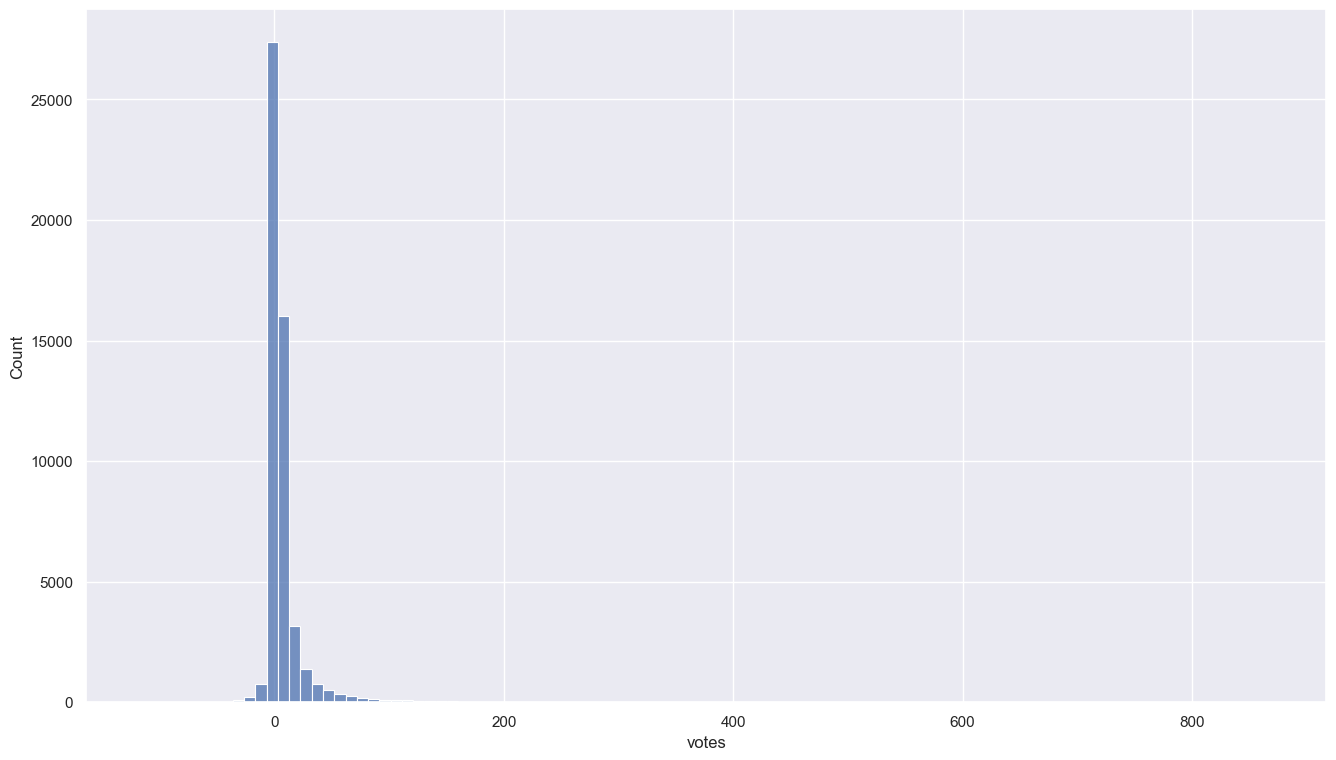

In [17]:
sns.histplot(data=df, x="votes", bins=100)

[(0.0, 100.0)]

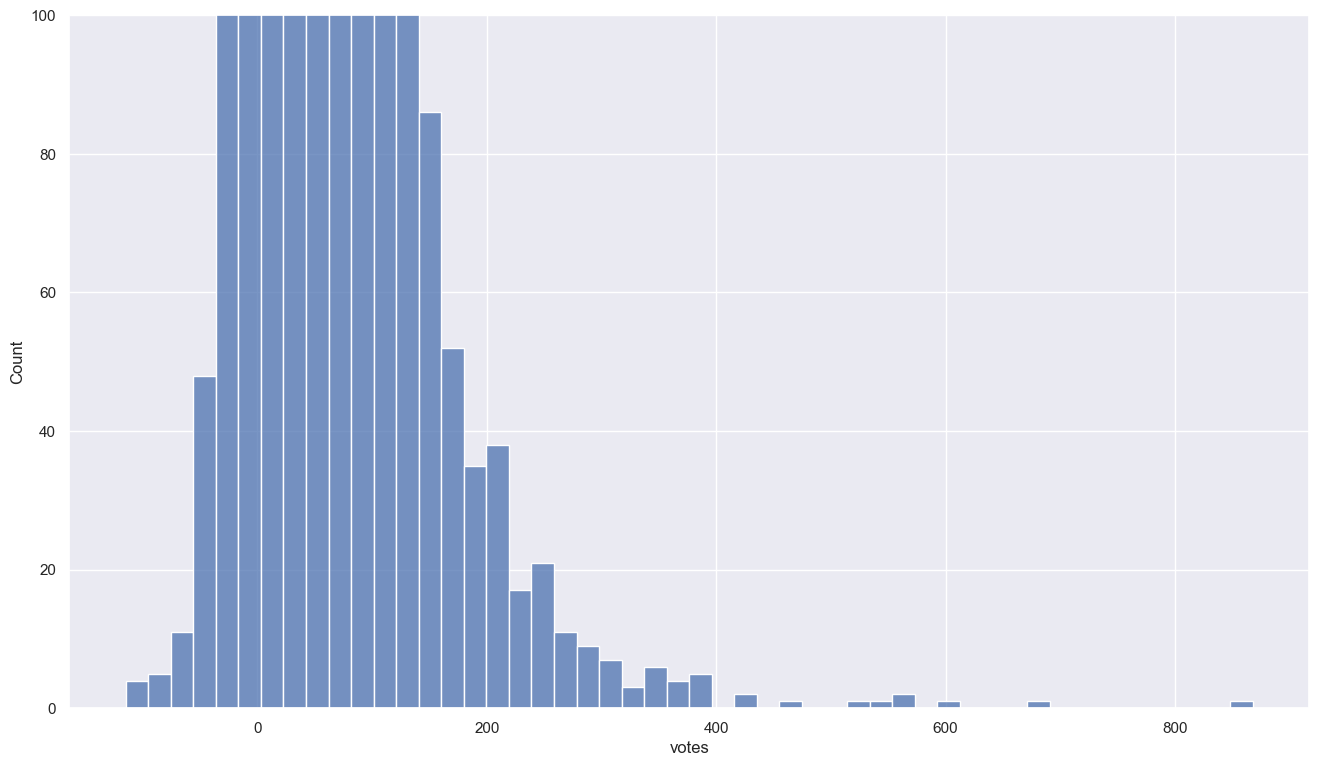

In [18]:
ax = sns.histplot(data=df, x="votes", bins=50)
ax.set(ylim=(0, 100))

In [19]:
print(f"99th quantile of votes: {df["votes"].quantile(0.99)}")

99th quantile of votes: 107.08999999999651


<Axes: xlabel='submission_flair', ylabel='votes'>

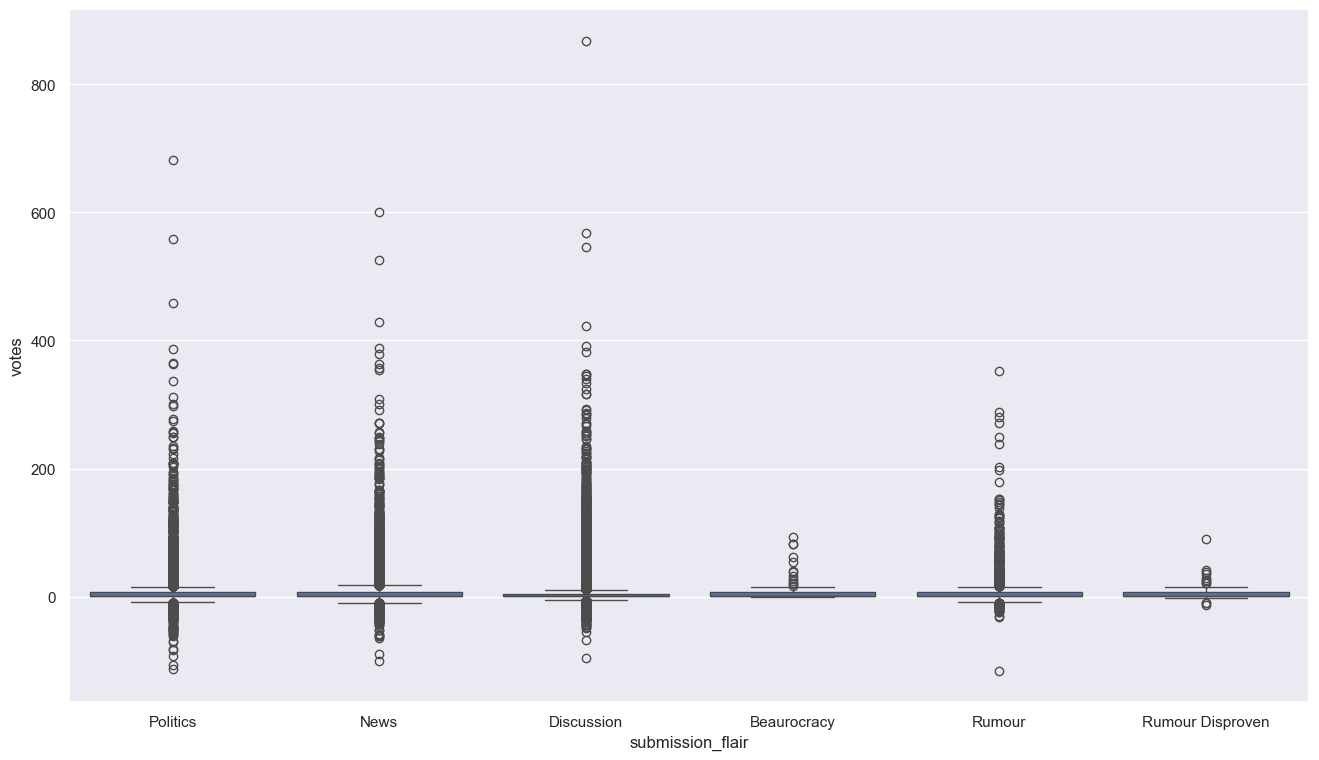

In [20]:
sns.boxplot(data=df, x="submission_flair", y="votes")

In [21]:
df.groupby("submission_flair")["votes"].describe()

,count,mean,std,min,25%,50%,75%,max
submission_flair,,,,,,,,
Beaurocracy,105.0,8.600000,17.053987,0.0,1.0,2.0,7.0,94.0
Discussion,23021.0,7.357543,22.600166,-95.0,1.0,2.0,5.0,868.0
News,10747.0,9.194938,25.572184,-100.0,1.0,2.0,8.0,601.0
Politics,13827.0,7.640992,22.636509,-113.0,1.0,2.0,7.0,682.0
Rumour,4035.0,7.865675,19.786836,-115.0,1.0,2.0,7.0,352.0
Rumour Disproven,105.0,6.238095,11.951443,-13.0,1.0,2.0,7.0,90.0


In [22]:
df.groupby(["submission_flair", "controversiality"])["votes"].mean()

submission_flair  controversiality
Beaurocracy       False               8.600000
Discussion        False               7.609906
                  True                0.283733
News              False               9.640602
                  True                0.358527
Politics          False               8.462755
                  True                0.550139
Rumour            False               8.045639
                  True                0.065934
Rumour Disproven  False               6.238095
Name: votes, dtype: float64

In [23]:
df.groupby(["submission_flair", "controversiality"])["votes"].median()

submission_flair  controversiality
Beaurocracy       False               2.0
Discussion        False               2.0
                  True                0.0
News              False               3.0
                  True                0.0
Politics          False               2.0
                  True                1.0
Rumour            False               3.0
                  True                0.0
Rumour Disproven  False               2.0
Name: votes, dtype: float64

In [24]:
df.groupby(["submission_flair", "controversiality"])["votes"].max()

submission_flair  controversiality
Beaurocracy       False                94
Discussion        False               868
                  True                 32
News              False               601
                  True                 21
Politics          False               682
                  True                 21
Rumour            False               352
                  True                  6
Rumour Disproven  False                90
Name: votes, dtype: int64

In [25]:
print(f"90th quantile of votes: {df["votes"].quantile(0.90)}")

90th quantile of votes: 18.0


1. Распределения голосов по категориям Politics, News, Discussion и Rumour похожи (по средним значениям и среднеквадратичным отклонениям)
2. Распределения голосов по категориям Beaurocracy и Rumour Disproven имеют заметно меньше отрицательных значений
2. Существует корреляция между отметкой спорности и рейтингом записи (спорные записи в среднем имеют рейтинг ниже 25 перцентиля)
3. Даже популярные записи (популярнее 90 квантиля по голосам) могут быть отмечены как спорные

### Признак created_timestamp

In [26]:
from datetime import datetime

In [27]:
df["created_datetime"] = df["created_timestamp"].apply(
    lambda x: datetime.fromtimestamp(x)
)

In [28]:
df["created_datetime"].min()

Timestamp('2019-04-28 12:35:08')

In [29]:
df["created_datetime"].max()

Timestamp('2024-10-27 19:32:54')

In [30]:
df["year"] = df["created_datetime"].apply(
    lambda x: x.year
)

In [31]:
df.groupby("year")["votes"].size()

year
2019       41
2020       44
2021      423
2022     1821
2023     6294
2024    43269
Name: votes, dtype: int64

In [32]:
df.groupby(["year", "submission_flair"])["votes"].size()

year  submission_flair
2019  Rumour                 12
      Rumour Disproven       29
2020  Rumour                 44
2021  News                  246
      Rumour                177
2022  News                  920
      Politics              258
      Rumour                567
      Rumour Disproven       76
2023  Discussion           3138
      News                 1868
      Politics              441
      Rumour                847
2024  Beaurocracy           105
      Discussion          19883
      News                 7713
      Politics            13128
      Rumour               2388
Name: votes, dtype: int64

In [33]:
df.groupby(["year", "controversiality"])["votes"].size()

year  controversiality
2019  False                  41
2020  False                  44
2021  False                 398
      True                   25
2022  False                1747
      True                   74
2023  False                6050
      True                  244
2024  False               40776
      True                 2493
Name: votes, dtype: int64

In [34]:
df.groupby("year")["votes"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2019,41.0,6.463415,7.506989,-3.0,2.0,5.0,7.0,39.0
2020,44.0,2.272727,3.787149,-5.0,1.0,1.0,3.0,16.0
2021,423.0,6.555556,24.768332,-36.0,1.0,2.0,6.0,429.0
2022,1821.0,8.569467,22.894268,-39.0,1.0,3.0,8.0,354.0
2023,6294.0,7.167779,20.048887,-89.0,1.0,2.0,6.0,525.0
2024,43269.0,7.941159,23.439794,-115.0,1.0,2.0,6.0,868.0


1. Собраны записи с конца апреля 2019 года по конец октября 2024 года
2. Более 85% записей приходятся на 2024 год. Это связано как с механизмом извлечения записей (извлекались записи толко с метками категории, в то время как записи старше 1 года редко имеют какую-либо категорию), так и с ростом популярности самого сообщества r/srilanka (за последний год количесво подписчиков [увеличилось на 19%](https://gummysearch.com/r/srilanka/))
3. 2019 и 2020 годы отличаются крайне малым количеством записей (около 0.1% от общего количества записей)
4. Из года в год структура обсуждаемых категорий значительно меняется (категории смещаются на 1-3 пункта в рейтинге популярности по количеству записей)
5. Не выявлено значительных отклонений в структуре отметок спорности в отрезке [2021, 2024] годов
6. Не выявлено значительных отклонений в распредлении голосов в отрезке [2021, 2024] годов

In [35]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline


c:\Users\Vizor\Desktop\Учеба\4 course\RPAA\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")
nlp = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)


c:\Users\Vizor\Desktop\Учеба\4 course\RPAA\.venv\Lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [68]:
res = df.loc[:, ['full_name','responds_to', 'text_body']]
res = res[res['responds_to'].isnull()==True]
all_entities = []
for i in res.itertuples():
    ner_results = nlp(i[3])
    for j in ner_results:
        entity = j
        entity["submission_id"] = i[1]

        all_entities.append(j)
print(len(all_entities))

1122


[{'entity_group': 'PER', 'score': np.float32(0.9972281), 'word': 'Harini Amarasuriya', 'start': 0, 'end': 18, 'submission_id': 't3_1fo8hat'}, {'entity_group': 'LOC', 'score': np.float32(0.99971044), 'word': 'Sri Lanka', 'start': 107, 'end': 116, 'submission_id': 't3_1fo8hat'}, {'entity_group': 'MISC', 'score': np.float32(0.57339954), 'word': 'Oh hell', 'start': 0, 'end': 7, 'submission_id': 't3_1g42r4y'}, {'entity_group': 'PER', 'score': np.float32(0.67960984), 'word': 'Ranil', 'start': 10, 'end': 15, 'submission_id': 't3_1fms0jd'}, {'entity_group': 'PER', 'score': np.float32(0.66187227), 'word': 'Gen Z', 'start': 31, 'end': 36, 'submission_id': 't3_1fdaqec'}, {'entity_group': 'PER', 'score': np.float32(0.9894068), 'word': 'Ranil', 'start': 14, 'end': 19, 'submission_id': 't3_1ennprd'}, {'entity_group': 'PER', 'score': np.float32(0.974848), 'word': 'Sajith Premadasa', 'start': 8, 'end': 24, 'submission_id': 't3_1fmojie'}, {'entity_group': 'MISC', 'score': np.float32(0.5858616), 'word':

In [69]:
entities_category = pd.DataFrame(all_entities)
entities_category

,entity_group,score,word,start,end,submission_id,responds_to
0,PER,0.997228,Harini Amarasuriya,0,18,t3_1fo8hat,NaN
1,LOC,0.999710,Sri Lanka,107,116,t3_1fo8hat,NaN
2,MISC,0.573400,Oh hell,0,7,t3_1g42r4y,NaN
3,PER,0.679610,Ranil,10,15,t3_1fms0jd,NaN
4,PER,0.661872,Gen Z,31,36,t3_1fdaqec,NaN
...,...,...,...,...,...,...,...
1117,LOC,0.998718,Colombo,50,57,t3_kerz3b,NaN
1118,LOC,0.999483,India,66,71,t3_kerz3b,NaN
1119,MISC,0.717813,What,0,4,t3_bq6r00,NaN
1120,MISC,0.538921,gu,12,14,t3_bq6r00,NaN


In [70]:
res_answers = df.loc[:, ['full_name','responds_to', 'text_body']]
res_answers = res_answers[(res_answers['responds_to'].isnull()==False) & (res_answers['text_body'].isnull()==False)]
all_entities_answers = []
for i in res_answers.itertuples():
    if i[3] is not None and  i[3]!="":
        ner_results = nlp(i[3])
        for j in ner_results:
            entity = j
            entity["submission_id"] = i[1]
            entity["responds_to"] = i[2]
            all_entities_answers.append(j)
print(len(all_entities_answers))

73635


In [71]:
entities_category_answers = pd.DataFrame(all_entities_answers)
entities_category_answers

,entity_group,score,word,start,end,submission_id,responds_to
0,ORG,0.995675,Open University,50,65,t1_loo6dk0,t3_1fo8hat
1,ORG,0.910365,JVP,134,137,t1_loo6dk0,t3_1fo8hat
2,ORG,0.922723,NPP,169,172,t1_loo6dk0,t3_1fo8hat
3,ORG,0.651204,Anthare,248,255,t1_loo6dk0,t3_1fo8hat
4,PER,0.914559,Harini,558,564,t1_loo6dk0,t3_1fo8hat
...,...,...,...,...,...,...,...
73630,ORG,0.782095,UN,39,41,t1_eo1moic,t1_eo1ma3y
73631,PER,0.887043,Haha,0,4,t1_eo45x4w,t1_eo3rvqw
73632,ORG,0.959726,UNP,161,164,t1_eo2xs00,t1_eo1moic
73633,ORG,0.622910,Immigration,5,16,t1_elz0zbf,t3_bi82s0


In [72]:
entities_category_answers.to_csv('outc.csv')

In [73]:
entities_category_answers['score'].median()

np.float32(0.8221739)

In [74]:
entities_category['score'].median()

np.float32(0.863131)

In [75]:
entities_category_answers['score'].quantile(0.75)

np.float64(0.9731913506984711)

In [76]:
entities_category['score'].quantile(0.75)

np.float64(0.9844866245985031)

In [77]:
answers_filtered = entities_category_answers[(entities_category_answers['score'] > 0.85)]
answers_filtered

,entity_group,score,word,start,end,submission_id,responds_to
0,ORG,0.995675,Open University,50,65,t1_loo6dk0,t3_1fo8hat
1,ORG,0.910365,JVP,134,137,t1_loo6dk0,t3_1fo8hat
2,ORG,0.922723,NPP,169,172,t1_loo6dk0,t3_1fo8hat
4,PER,0.914559,Harini,558,564,t1_loo6dk0,t3_1fo8hat
5,LOC,0.965340,Sri Lanka,47,56,t1_loo37mt,t3_1fo8hat
...,...,...,...,...,...,...,...
73621,LOC,0.993781,Hambantota,441,451,t1_gg7ij7l,t1_gg5rufw
73627,LOC,0.970297,North Korea,983,994,t1_eo4jj2i,t3_bq6r00
73628,PER,0.979266,Mahendran,1153,1162,t1_eo4jj2i,t3_bq6r00
73631,PER,0.887043,Haha,0,4,t1_eo45x4w,t1_eo3rvqw


In [78]:
submissions_filtered = entities_category[(entities_category['score'] > 0.85)]
submissions_filtered

,entity_group,score,word,start,end,submission_id,responds_to
0,PER,0.997228,Harini Amarasuriya,0,18,t3_1fo8hat,NaN
1,LOC,0.999710,Sri Lanka,107,116,t3_1fo8hat,NaN
5,PER,0.989407,Ranil,14,19,t3_1ennprd,NaN
6,PER,0.974848,Sajith Premadasa,8,24,t3_1fmojie,NaN
10,ORG,0.951385,AKD,26,29,t3_1fp4jsv,NaN
...,...,...,...,...,...,...,...
1111,MISC,0.994223,Spotify,17,24,t3_kynr76,NaN
1112,PER,0.946805,Nalin K,1,8,t3_kz1cdl,NaN
1116,MISC,0.881802,Naruto,58,64,t3_jsm9cx,NaN
1117,LOC,0.998718,Colombo,50,57,t3_kerz3b,NaN


In [56]:
submissions_filtered['entity_group'].value_counts()

entity_group
LOC     245
PER     126
MISC    112
ORG     100
Name: count, dtype: int64

In [57]:
answers_filtered['entity_group'].value_counts()

entity_group
LOC     13220
PER      8237
MISC     6869
ORG      5882
Name: count, dtype: int64

In [58]:
answers_filtered['word'].value_counts()

word
Sri Lanka                 3649
Ranil                     1612
India                      997
NPP                        664
Israel                     636
                          ... 
RX 590                       1
VGA Cards Buy and Sell       1
Winsoft                      1
Nanotech                     1
Counter _ Narc               1
Name: count, Length: 7369, dtype: int64

In [88]:
print(dict(submissions_filtered['word'].value_counts()))

dict_keys(['Sri Lanka', 'Ranil', 'AKD', 'NPP', 'Colombo', 'India', 'Sajith', 'SL', 'Srilanka', 'Sajith Premadasa', 'Namal', 'Anura', 'Ranil Wickremesinghe', 'Elon Musk', 'Harini Amarasuriya', 'Canada', 'Lanka', 'Anura Kumara Dissanayake', 'Facebook', 'Ravi Seneviratne', 'Namal Rajapaksa', 'Online Safety Bill', 'SriLankan Airlines', 'Dubai', 'Mahinda Rajapaksa', 'Lebanon', 'Ukrainian', 'Gota', 'Sinhala', 'NASA', 'Thailand', 'Central Bank', 'Spotify', 'Ranjan', 'Trinity', 'Ottawa', 'Srilankan', 'Gotabaya', 'English', 'Sanath Nishantha', 'Times Square', 'Reddit', 'Jerome', 'Airtel', 'Batticaloa', 'Israel', 'Mahinda', 'Buddhist', 'Wellawatte', 'ASEAN', 'Rohana Wijeweera', 'Ranil MF', 'Suriya Kanda', 'Commission to In', 'Dead Serious', 'Tom Pacha', 'Gen Z', 'Ranil Wickramasing', 'CORRUPT', 'D', '##hammika Perera', 'Tamil', 'Cuba', 'Che', 'Lenin', 'UNP', 'Lasantha Wickramatunge', 'UK', 'Sri Lankan conflict', 'Sinh', '##e', 'General Election', 'Laka', 'Koombiyo', 'IMF', 'Gammanpila', 'US', 'N

In [ ]:
def entities_emotions(entities_df, emotions_df):
    entities_list = dict(entities_df['word'].value_counts())
    emotions = []
    result = dict()
    
    for entity in entities_list.keys():
        result[entity] = ()
        sub_fr = entities_df[(entities_df['word']==entity)]
        merged_fr = sub_fr.merge(emotions_df, on="submission_id")
        merged_fr["max_value"] = merged_fr[emotions].max(axis=1) 
        for emotion in emotions:
            merged_fr.loc[merged_fr[emotion]  != merged_fr["max_value"], emotion] = 0
            merged_fr.loc[merged_fr[emotion]  == merged_fr["max_value"], emotion] = 1
            result[entity][emotion] = merged_fr[emotion].sum()
    return result
    

In [98]:
keys = list(dict(submissions_filtered['word'].value_counts()).keys())
print(keys[0])
sub_fr = answers_filtered[(answers_filtered['word']==keys[0])]
sub_fr

Sri Lanka


,entity_group,score,word,start,end,submission_id,responds_to
5,LOC,0.965340,Sri Lanka,47,56,t1_loo37mt,t3_1fo8hat
6,LOC,0.999082,Sri Lanka,164,173,t1_loo37mt,t3_1fo8hat
17,LOC,0.916786,Sri Lanka,11,20,t1_looagkh,t3_1fo8hat
26,LOC,0.998658,Sri Lanka,155,164,t1_loupxck,t3_1fo8hat
42,LOC,0.999746,Sri Lanka,39,48,t1_loo3dpl,t1_loo37mt
...,...,...,...,...,...,...,...
73425,LOC,0.998478,Sri Lanka,815,824,t1_hyxdffd,t3_t49aoy
73472,LOC,0.964168,Sri Lanka,162,171,t1_i2p6ycq,t3_ts3p2v
73530,LOC,0.960788,Sri Lanka,20,29,t1_elyu920,t3_bi8e5q
73560,LOC,0.999656,Sri Lanka,303,312,t1_gjc2rbe,t3_kxsyrs


In [65]:
res['result']=res['text_body'].apply(lambda x: nlp(x))
res

,full_name,responds_to,text_body,result
0,t3_1fo8hat,NaN,"Harini Amarasuriya, feminist and outspoken adv...","[{'entity_group': 'PER', 'score': 0.9972281, '..."
159,t3_1g42r4y,NaN,Oh hell nawww this ain’t it.,"[{'entity_group': 'MISC', 'score': 0.57339954,..."
371,t3_1fms0jd,NaN,Thank you Ranil! Thank you for everything you ...,"[{'entity_group': 'PER', 'score': 0.67960984, ..."
477,t3_1fxp8ei,NaN,What do you guys think about this person? I th...,[]
647,t3_1g16d6e,NaN,It finally happened - his nomination got rejected,[]
...,...,...,...,...
51860,t3_kxsyrs,NaN,SLT throttling ping like crazy,"[{'entity_group': 'MISC', 'score': 0.6677458, ..."
51865,t3_jsm9cx,NaN,For the fellow weebs who were worried Hiru TVs...,"[{'entity_group': 'MISC', 'score': 0.40421125,..."
51871,t3_kerz3b,NaN,Is it true that the government sold a part of ...,"[{'entity_group': 'LOC', 'score': 0.99871755, ..."
51876,t3_bq6r00,NaN,What do you guys think?,"[{'entity_group': 'MISC', 'score': 0.7178134, ..."
